#                                                               
                                         Grammatical Error Correction
                                           
Introduction:

It is the process by which the detection and correction to an error in the text are done. The problem seems easy to understand but is actually tough due to the diverse vocabulary and set of rules in a language. In addition, we are not only going to identify the mistake but correction is also required.

Problem statement:

The main purpose of this task is to check out grammatical errors in English sentences and correct them. Grammatical error detection and correction are important applications in the automatic proofreading of English texts and in the field of English learning aids. 
With the increasing influence of English on a global scale, a huge breakthrough has been made in the task of detecting English grammatical errors. Based on machine learning,  In this input is a grammatically incorrect sentence and output is a grammatically correct sentence, So we can formulate this problem as a sequence to sequence learning problem.


In [43]:
# importing library


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:

# Apply the edits of a single annotator to generate the corrected sentences.
def main():
    """
    this function stores the correct sentence line by line in as txt file with file name lang8.train.auto.bea19.m2
    """
    
    data = open("lang8.train.auto.bea19.m2").read().strip().split("\n\n")  #taking a sample dataset
    out = open("lang8.train.auto.bea19.txt", "w")
    # Do not apply edits with these error types
    skip = {"noop", "UNK", "Um"}
    
    for sent in data:
        sent = sent.split("\n")
        cor_sent = sent[0].split()[1:] 
        edits = sent[1:]
        offset = 0
        for edit in edits:
            edit = edit.split("|||")
            if edit[1] in skip: continue    # Ignore certain edits
            coder = int(edit[-1])
            if coder != 0: continue      # Ignore other coders
            span = edit[0].split()[1:]      # Ignore "A "
            start = int(span[0])
            end = int(span[1])
            cor = edit[2].split()
            cor_sent[start+offset:end+offset] = cor
            offset = offset-(end-start)+len(cor)
        out.write(" ".join(cor_sent)+"\n")
        
main()

In [46]:
#preprocessing incorrect sentences

file1 = open("lang8.train.auto.bea19.m2","r")
s1 = file1.read()

each_sent = s1.split("\n\n")

incorrect = []
for i in range(len(each_sent)):
    temp = each_sent[i].split("\n")
    temp = temp[0]
    temp = temp.split(" ")
    temp = temp[1:]# ignore S
    temp = ' '.join(temp)
    incorrect.append(temp)
    
#preprocessing correct sentences

file2 = open("lang8.train.auto.bea19.txt","r")
s2 = file2.read()

correct = s2.split("\n")

# storing correct and incorrect sentence pair into dataframe
df = pd.DataFrame()
df["correct"] = correct
df["incorrect"] = incorrect

#store into csv file named data.csv
df.to_csv("data.csv",index=False)


I can see that there are some sentences that have the same pair of correct and incorrect sentences

In [47]:
index = []
for i in range(len(df.values)):
    if df.values[i][0] == df.values[i][1]:
        index.append(i)
df = df.drop(index)
df.shape

(498360, 2)

After removing i have only 498360 sentence out of 1037560

In [62]:
df.isnull().values.any()

df.dropna(inplace = True)
df.shape

(496339, 2)

After removing null and duplicate values I have 496339 sentence

In [63]:
df.duplicated().values.any()
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df.shape

(496339, 2)

 Exploratory Data Analysis

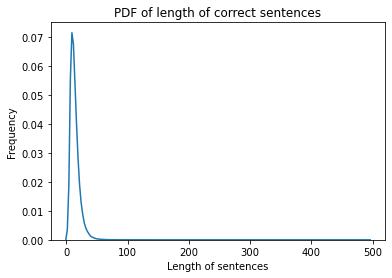

In [50]:
#plotind the pdf to correct the length of sentence
cor_length = df["correct"].str.split().apply(len)
cor_length = list(cor_length)
sns.kdeplot(cor_length)
plt.xlabel("Length of sentences")
plt.ylabel("Frequency")
plt.title("PDF of length of correct sentences")
plt.show()

We can see the majority of sentence length less than 50 and very few sentence length more than 50.

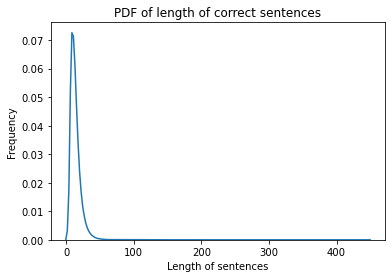

In [55]:
#ploting the incorrect sentence
incor_length = df["incorrect"].str.split().apply(len)
incor_length = list(incor_length)
sns.kdeplot(incor_length)
plt.xlabel("Length of sentences")
plt.ylabel("Frequency")
plt.title("PDF of length of correct sentences")
plt.show()

We can see here same behavior is happen as for output sentences

In [60]:
# for incorrect sentences


split_sent = np.array(df["incorrect"].str.split())

unique = []
for i in split_sent:
    if type(i) == float:
        continue
    for j in i:
        unique.append(j)
unique_words_train_incorr = set(unique)
print("The total number of  incorrect sentences are",len(unique_words_train_incorr))

The total number of unique words in incorrect sentences are 102686


In [61]:
# for correct sentences
split_sent = np.array(df["correct"].str.split())

unique = []
for i in split_sent:
    for j in i:
        unique.append(j)
unique_words_train_corr = set(unique)
print("Total number of correct sentance are",len(unique_words_train_corr))

Total number of correct sentance are 80347


conclusion: We can see that there are 102686 and 80347 unique words in input and output sentence respectively